### Librerie

In [ ]:
# librerie
!pip install yfinance
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use("seaborn")
import seaborn as sns

<ipython-input-1-9abf73d87eb2>:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


### Funzioni

In [ ]:
def grafico(rr,titolo):
  # Creazione della figura e dei sottografici
  fig, axs = plt.subplots(2, 1, figsize=(20, 8), gridspec_kw={'height_ratios': [3, 1]})

  # Plot del primo DataFrame nel subplot principale
  axs[0].plot(rr.cumsum(), label=rr.columns)
  axs[0].set_title(titolo)
  axs[0].set_ylabel('Rendimento [%]')
  axs[0].legend()

  # Plot del secondo DataFrame nel subplot inferiore
  axs[1].plot(cambi_chart, color='orange', label='EUR/USD')
  axs[1].set_title('Euro/Dollaro')
  axs[1].set_ylabel('Cambio')

  # Spaziatura tra i subplot
  plt.tight_layout()

  # Mostra il grafico
  plt.show()

In [ ]:
def drawdown(returns):
    wealth = (1 + returns).cumprod()
    previous_peaks = wealth.cummax()
    drawdowns = (wealth - previous_peaks) / previous_peaks
    return drawdowns

# Elaborazione

In [ ]:
euro = [['X13E.MI','Euro breve termine'],['EM710.MI','Euro medio termine'],['EM1015.MI','Euro lungo termine'],['XGLE.MI','Euro tutte le scadenze']]
usa = [['SHY','US breve termine'],['IEF','US medio termine'],['TLT','US lungo termine'],['BND','US tutte le scadenze']]
# jpn = [['XJSE.MI','Giappone tutte le scadenze']]
# chn = [['AYER.MI','Cina tutte le scadenze']]
usa_hdg = [['2B7S','US breve hedged']]
titoli = euro + usa
tickers = [l[0] for l in titoli]
nomi = [l[1] for l in titoli]
valute = ['eurusd=x']

prezzi = yf.download(tickers)['Adj Close']
cambi = yf.download(valute)['Close']

rendimenti = np.log(prezzi/prezzi.shift(1)).dropna()
var_cambi = np.log(cambi/cambi.shift(1)).dropna()

rendimenti = rendimenti.reindex(tickers,axis=1)

[*********************100%%**********************]  8 of 8 completed
[*********************100%%**********************]  1 of 1 completed


In [ ]:
# trasformo in mensile
rendimenti = rendimenti.resample('M').sum()
var_cambi = var_cambi.resample('M').sum()

In [ ]:
output=[]
for titolo in tickers:
  output.append(yf.Ticker(titolo).info["currency"])

valute = pd.DataFrame({'ticker':tickers, 'nomi': nomi, 'valute':output})
valute_mapping = valute.set_index('ticker')['valute'].to_dict()
nomi_mapping = valute.set_index('ticker')['nomi'].to_dict()

In [ ]:
valute

,ticker,nomi,valute
0,X13E.MI,Euro breve termine,EUR
1,EM710.MI,Euro medio termine,EUR
2,EM1015.MI,Euro lungo termine,EUR
3,XGLE.MI,Euro tutte le scadenze,EUR
4,SHY,US breve termine,USD
5,IEF,US medio termine,USD
6,TLT,US lungo termine,USD
7,BND,US tutte le scadenze,USD


In [ ]:
risultati = rendimenti.copy()
risultati_nomi = nomi.copy()
for titolo in risultati.columns:
  for mese in risultati.index:
    if valute_mapping.get(titolo) != 'EUR':
      if nomi_mapping.get(titolo)+' in euro' not in risultati_nomi:
        risultati_nomi.append(nomi_mapping.get(titolo)+' in euro')
      risultati.loc[mese,titolo+' IN EURO'] = rendimenti.loc[mese,titolo]-var_cambi[mese]

In [ ]:
risultati_breve = risultati.iloc[:,[0,4,8]]
risultati_medio = risultati.iloc[:,[1,5,9]]
risultati_lungo = risultati.iloc[:,[2,6,10]]
risultati_all = risultati.iloc[:,[3,7,11]]
cambi_chart = cambi[cambi.index>=risultati.index.min()]

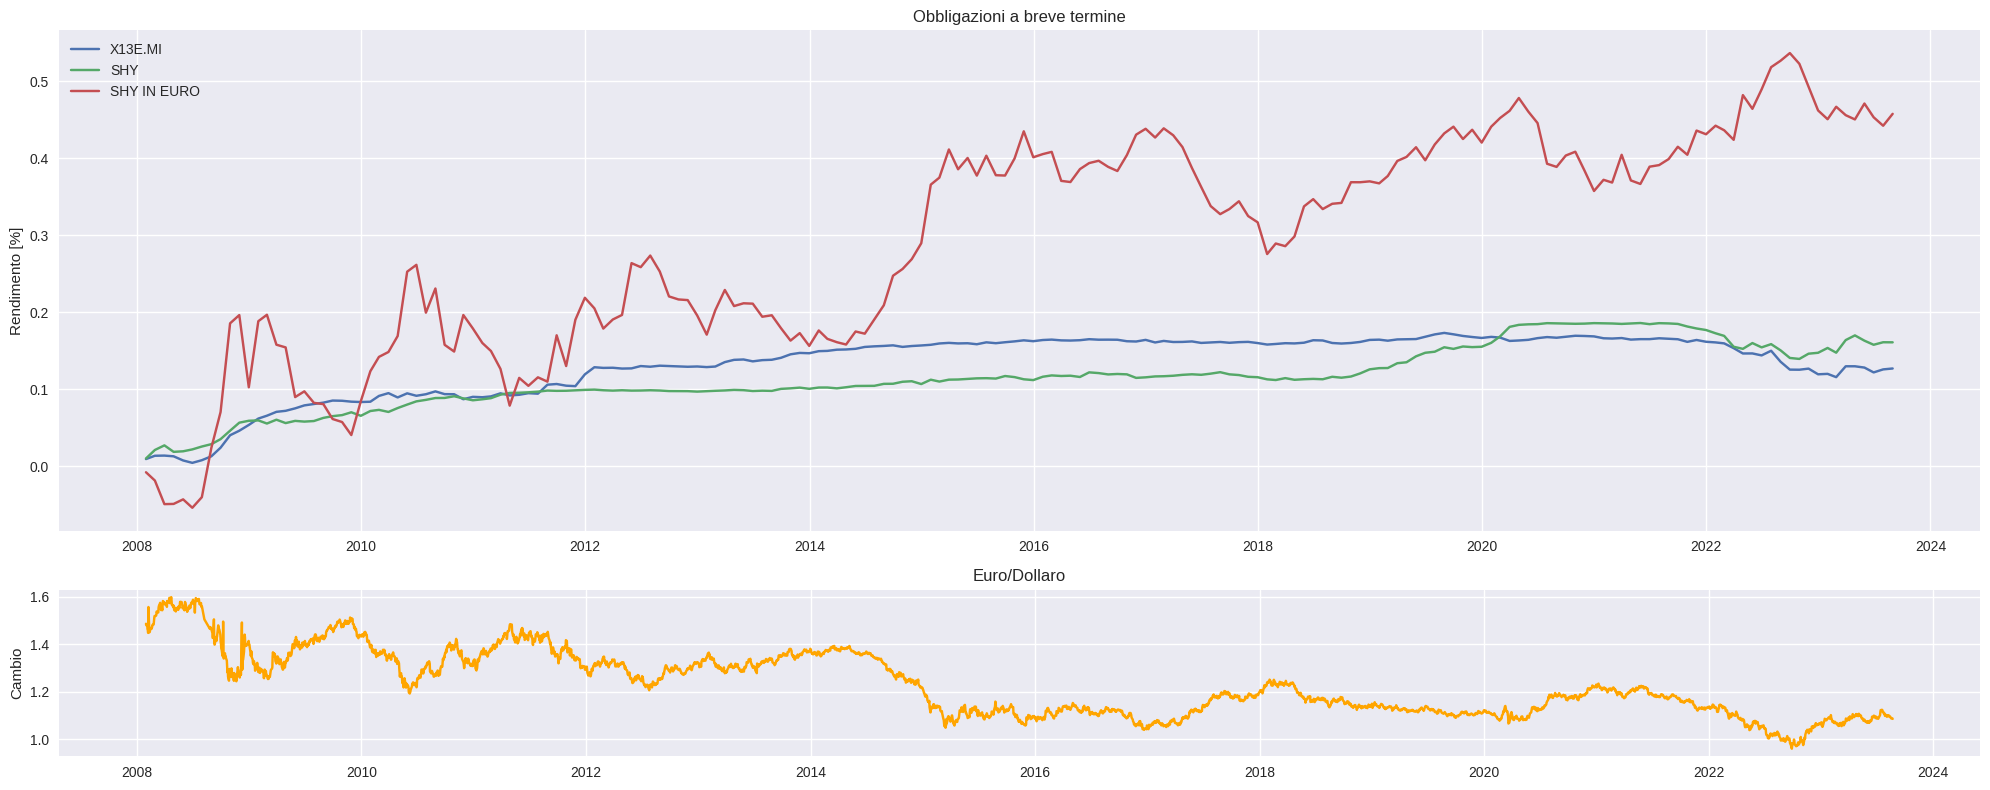

In [ ]:
grafico(risultati_breve,'Obbligazioni a breve termine')

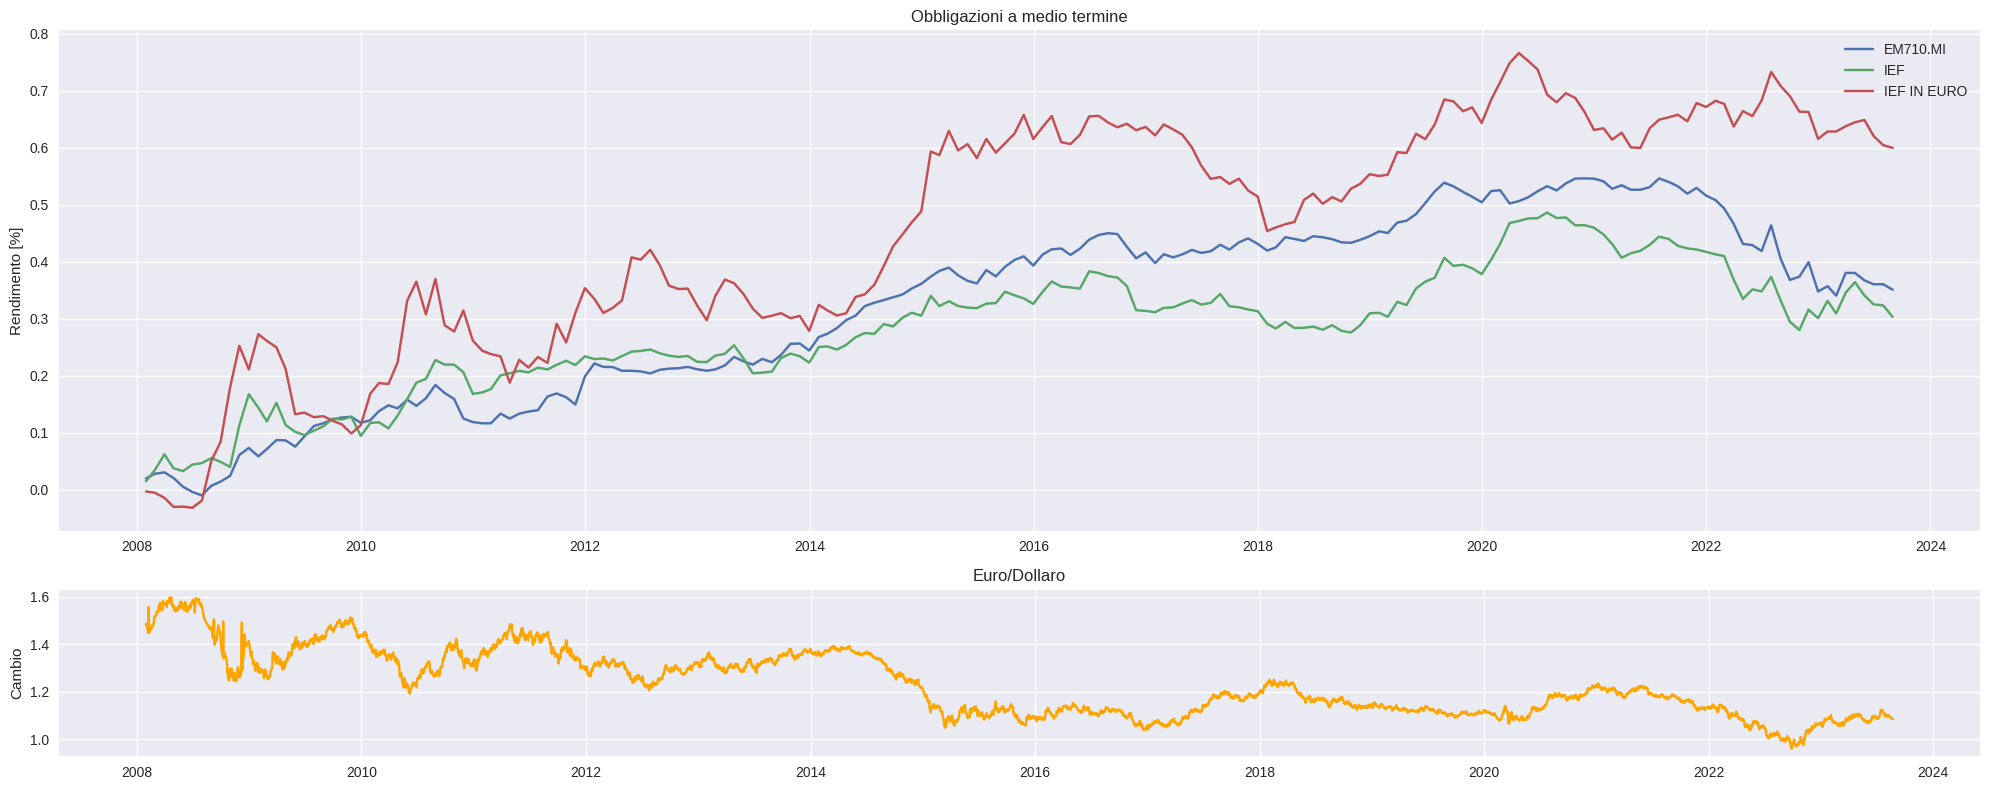

In [ ]:
grafico(risultati_medio,'Obbligazioni a medio termine')

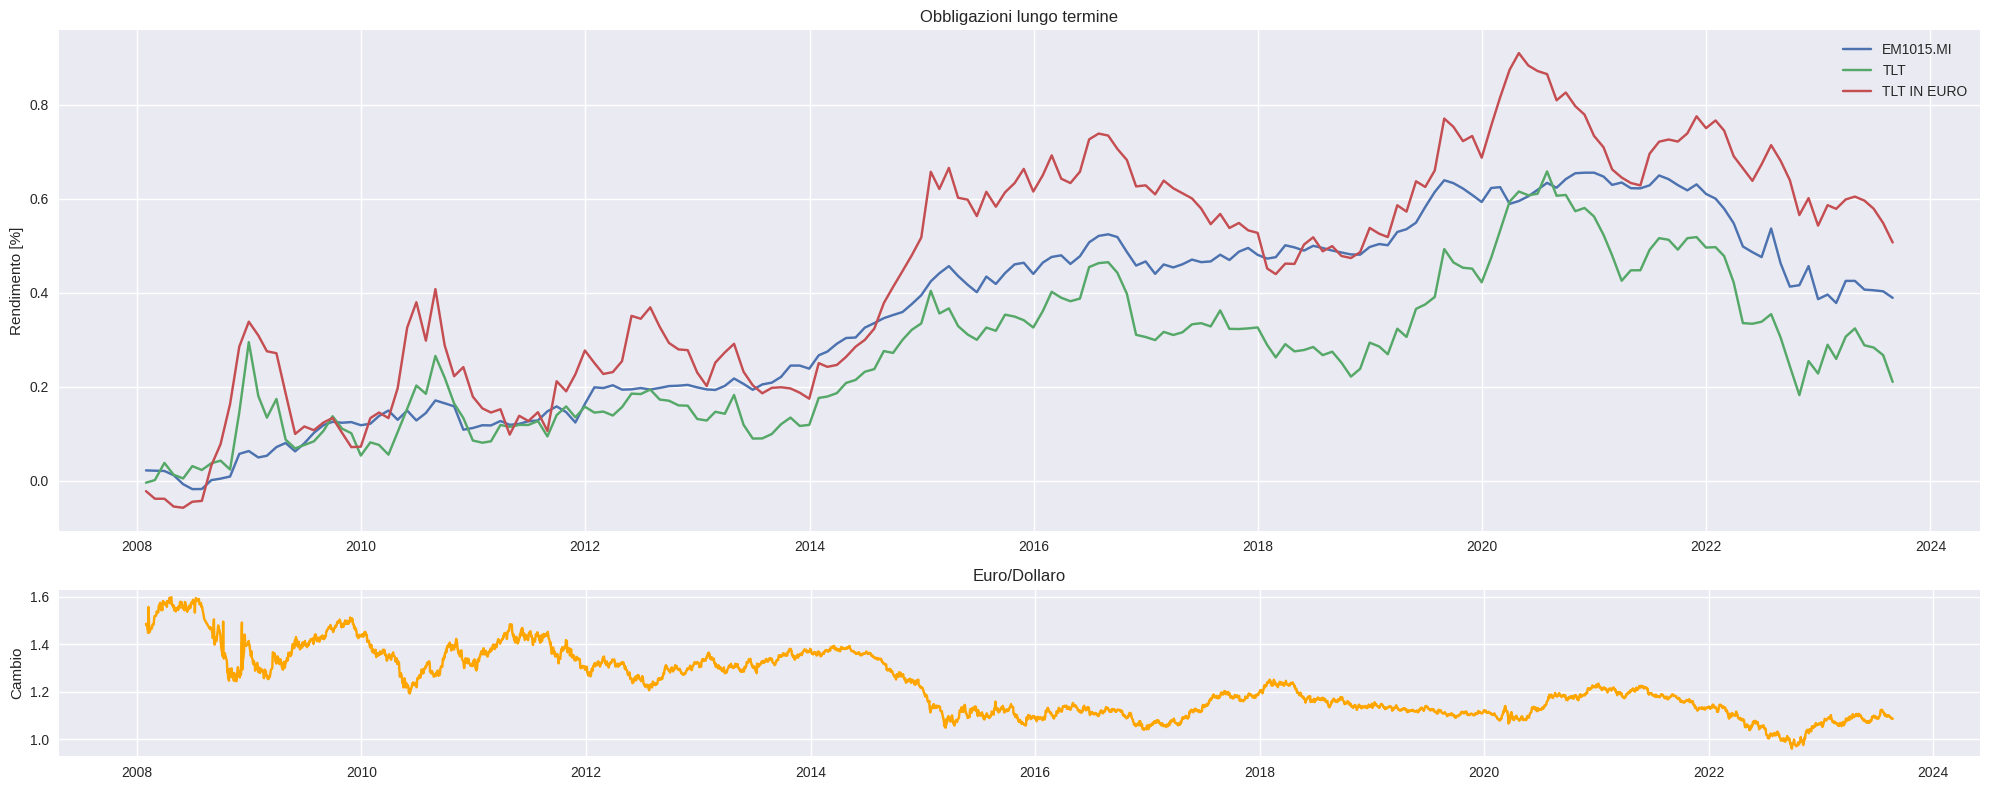

In [ ]:
grafico(risultati_lungo,'Obbligazioni lungo termine')

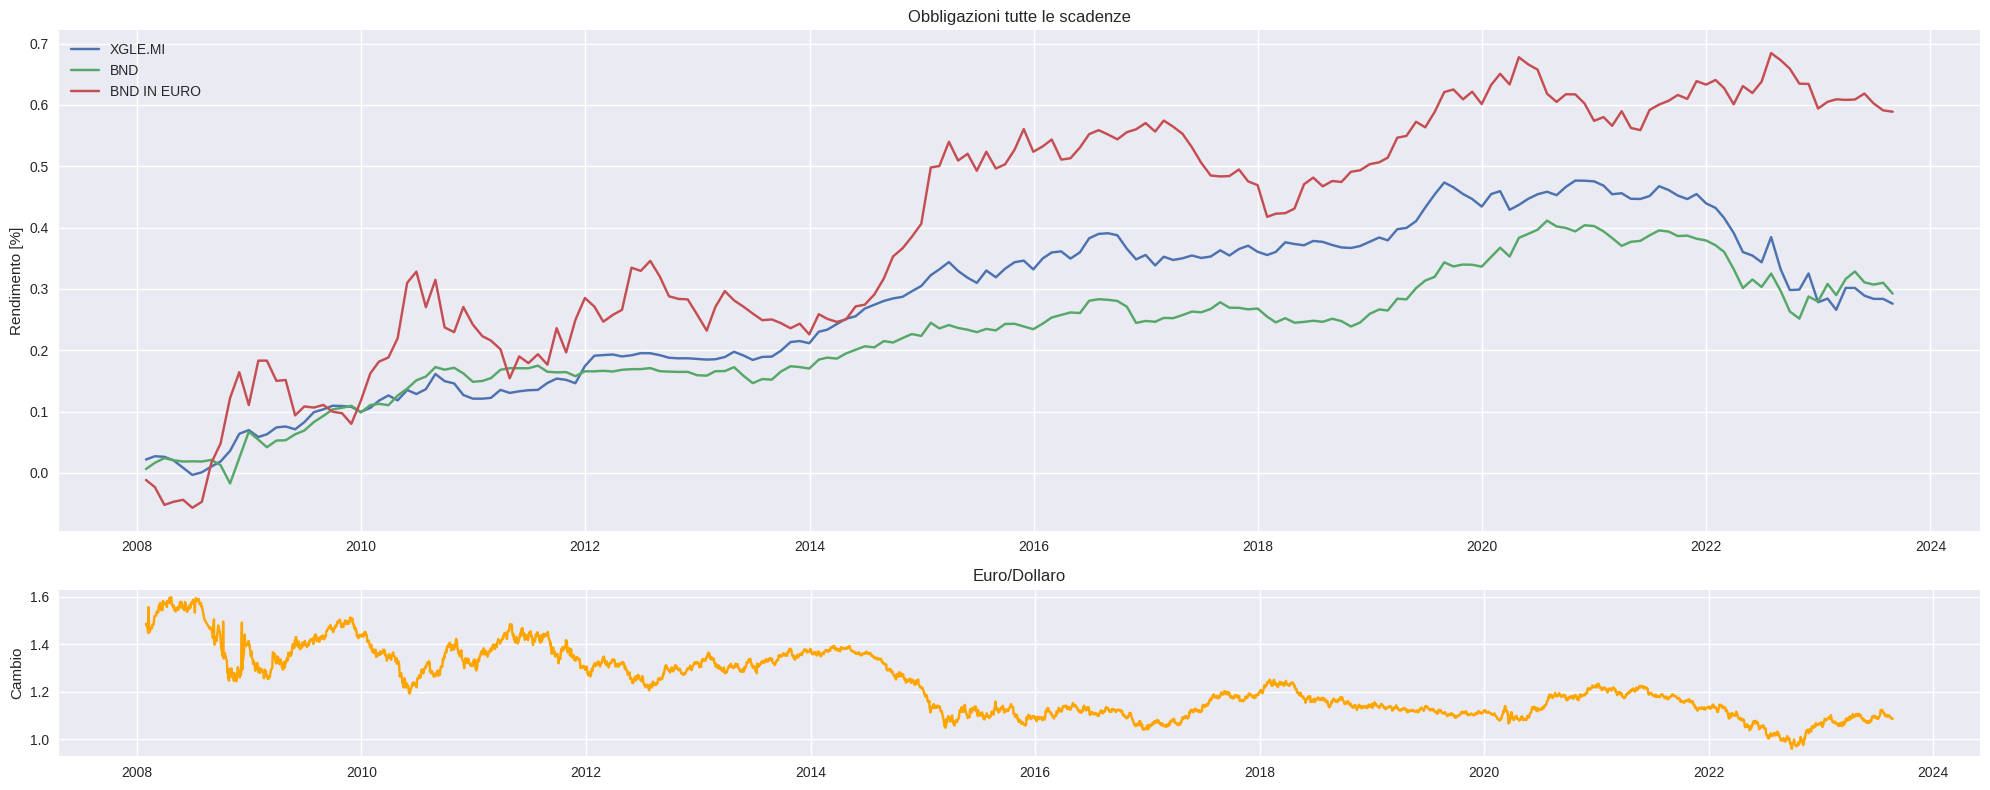

In [ ]:
grafico(risultati_all,'Obbligazioni tutte le scadenze')

---

In [ ]:
risclean = risultati.drop(columns=['SHY','IEF','TLT','BND'])

In [ ]:
#risultati annuali
risultati_y = risclean.resample('A').sum()
risultati_y.index = risultati.index.year.unique()
risultati_y.describe()

,X13E.MI,EM710.MI,EM1015.MI,XGLE.MI,SHY IN EURO,IEF IN EURO,TLT IN EURO,BND IN EURO
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,0.007947,0.021916,0.024315,0.017245,0.028604,0.037462,0.031673,0.036806
std,0.020236,0.061807,0.079932,0.056345,0.069470,0.101651,0.163703,0.075281
min,-0.042229,-0.168195,-0.223782,-0.161214,-0.121379,-0.121909,-0.265827,-0.101296
25%,0.001947,0.010293,0.011198,0.010071,-0.019317,-0.033955,-0.049071,-0.027229
50%,0.006145,0.027554,0.037559,0.024561,0.038369,0.030103,0.014869,0.038816
75%,0.011956,0.047786,0.056805,0.044127,0.078828,0.100852,0.100296,0.101229
max,0.053890,0.117017,0.156212,0.093314,0.133253,0.210961,0.342826,0.180225


In [ ]:
#rendimenti annuali
risultati_y

,X13E.MI,EM710.MI,EM1015.MI,XGLE.MI,SHY IN EURO,IEF IN EURO,TLT IN EURO,BND IN EURO
Date,,,,,,,,
2008,0.053890,0.073181,0.063194,0.069847,0.102767,0.210961,0.338273,0.110737
2009,0.029736,0.043964,0.054938,0.029767,-0.018089,-0.097821,-0.265827,0.006942
2010,0.006735,0.001435,-0.005965,0.021538,0.094448,0.148142,0.106321,0.124156
2011,0.029184,0.079890,0.051107,0.053056,0.039797,0.092126,0.098288,0.043435
2012,0.010215,0.012686,0.035340,0.011713,-0.022999,-0.030447,-0.046863,-0.027196
2013,0.017176,0.032823,0.039779,0.025573,-0.039450,-0.044479,-0.055694,-0.032138
2014,0.010088,0.117017,0.156212,0.093314,0.133253,0.209448,0.342826,0.180225
2015,0.005555,0.031977,0.045295,0.027040,0.111585,0.127028,0.097786,0.117459
2016,0.001708,0.023132,0.026522,0.023549,0.036942,0.021159,0.013185,0.046791


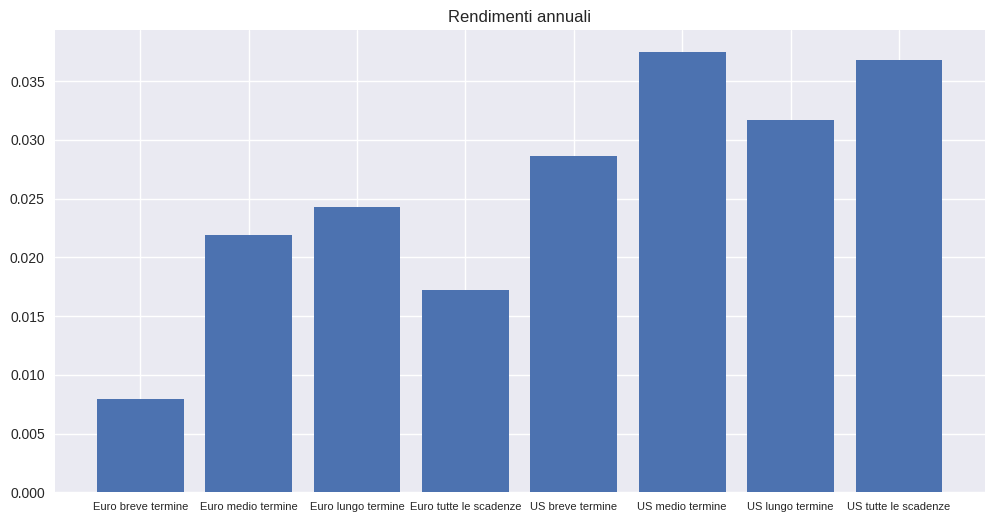

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(nomi,risultati_y.mean())
plt.title('Rendimenti annuali')
plt.xticks(fontsize=8)
plt.show()

In [ ]:
#deviazione annuale
stdev = []
for anno in risclean.index.year.unique():
  risu = risclean[(risclean.index.year==anno)]
  sd = np.std(risu)*np.sqrt(12)
  stdev.append(sd)

stdev = pd.DataFrame(stdev,index=risclean.index.year.unique())

In [ ]:
stdev

,X13E.MI,EM710.MI,EM1015.MI,XGLE.MI,SHY IN EURO,IEF IN EURO,TLT IN EURO,BND IN EURO
Date,,,,,,,,
2008,0.020546,0.049093,0.058732,0.041290,0.170253,0.137619,0.156182,0.124705
2009,0.008703,0.037870,0.042819,0.027313,0.126321,0.107917,0.116008,0.108225
2010,0.014785,0.054638,0.071829,0.042687,0.146479,0.183849,0.261074,0.156502
2011,0.018310,0.056141,0.051764,0.031052,0.119690,0.119911,0.148394,0.117374
2012,0.009569,0.026024,0.036752,0.018241,0.087583,0.100346,0.129961,0.090954
2013,0.007584,0.033499,0.037667,0.021350,0.061930,0.072802,0.094338,0.061549
2014,0.003926,0.019216,0.025212,0.015004,0.046654,0.057142,0.073375,0.046401
2015,0.004160,0.043739,0.071194,0.043929,0.108334,0.136415,0.188686,0.124417
2016,0.003763,0.044866,0.065649,0.045107,0.054425,0.067763,0.124604,0.047900


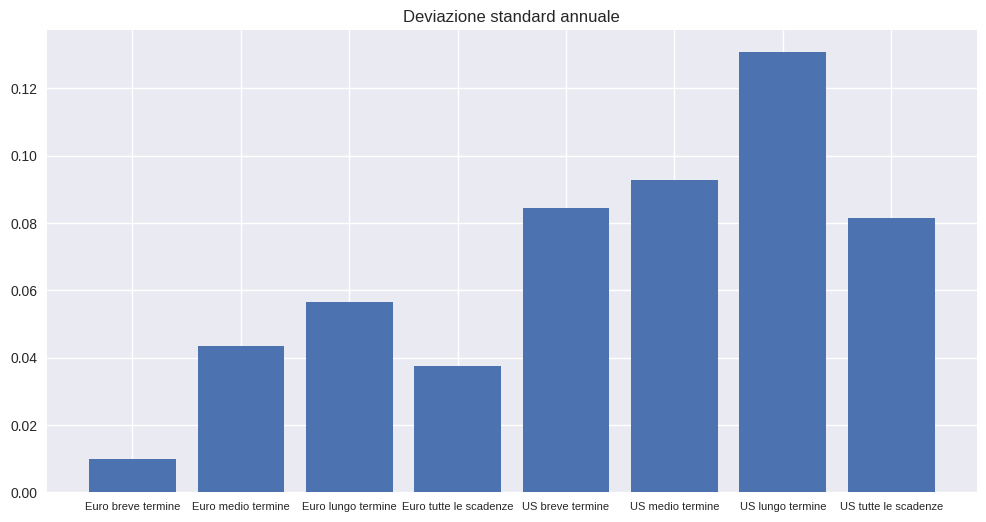

In [ ]:
plt.figure(figsize=(12,6))
plt.bar(nomi,stdev.mean())
plt.title('Deviazione standard annuale')
plt.xticks(fontsize=8)
plt.show()

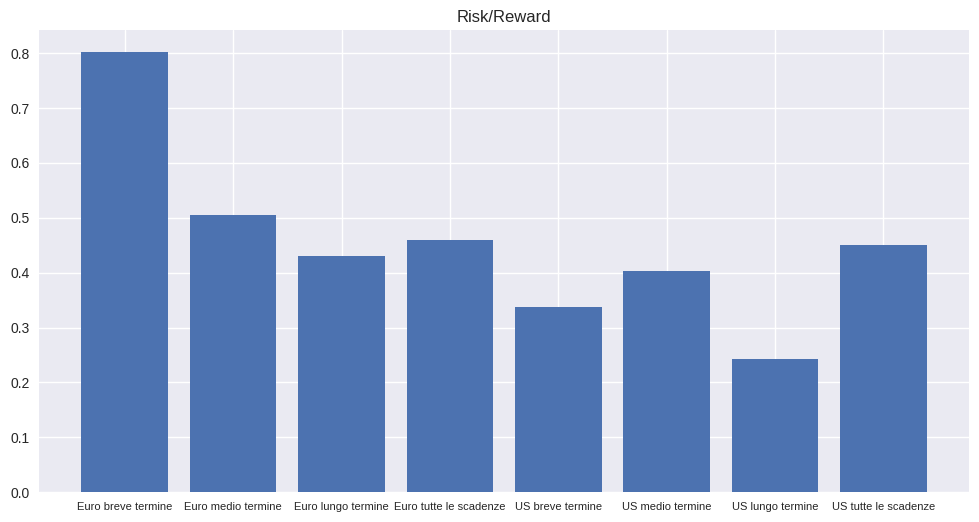

In [ ]:
risk_reward = risultati_y.mean()/stdev.mean()
plt.figure(figsize=(12,6))
plt.bar(nomi,risk_reward)
plt.title('Risk/Reward')
plt.xticks(fontsize=8)
plt.show()



---



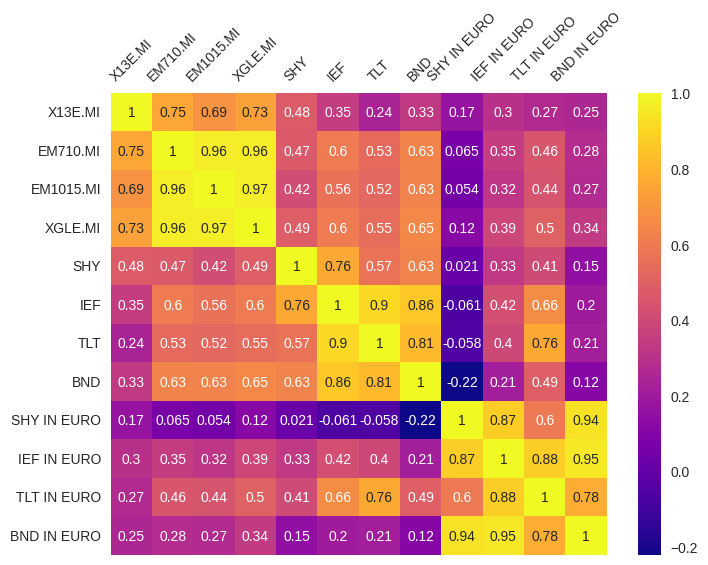

In [ ]:
correl = risultati.corr()

# Creare una heatmap utilizzando seaborn
plt.figure(figsize=(8, 6))  # Imposta la dimensione della figura
ax = sns.heatmap(correl, annot=True, cmap='plasma', xticklabels=True)
ax.xaxis.tick_top()
plt.xticks(rotation=45)
plt.show()

In [ ]:
# risultati a 10 anni
risultati_annuali = risclean.resample('A').sum()
risultati_rolling = risultati_annuali.rolling(window=10).mean()
risultati_rolling.describe()

,X13E.MI,EM710.MI,EM1015.MI,XGLE.MI,SHY IN EURO,IEF IN EURO,TLT IN EURO,BND IN EURO
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000
mean,0.006350,0.031093,0.038817,0.025409,0.026825,0.038384,0.043051,0.038919
std,0.006449,0.013510,0.015393,0.012443,0.005658,0.009743,0.015136,0.006299
min,-0.001978,0.010668,0.015064,0.006442,0.017840,0.029231,0.019947,0.033221
25%,0.001607,0.022683,0.031082,0.017885,0.023918,0.031932,0.032232,0.034190
50%,0.007844,0.037148,0.044674,0.030710,0.026727,0.034229,0.047299,0.036295
75%,0.009675,0.040682,0.047756,0.034442,0.030903,0.044189,0.054093,0.043084
max,0.016016,0.043108,0.054308,0.036054,0.033567,0.052987,0.061465,0.048369


---

### AGGH

In [ ]:
tk = [['SHY','US gov breve termine'],['IEF','US gov medio termine'],['TLT','US gov lungo termine'],['AGG','US aggregate'], ['^GSPC','S&P500']]
tks = [l[0] for l in tk]
nms = [l[1] for l in tk]
prezzo = yf.download(tks)['Adj Close']
rnd = np.log(prezzo/prezzo.shift(1)).dropna()
rnd= rnd.reindex(tks,axis=1)

[*********************100%%**********************]  5 of 5 completed


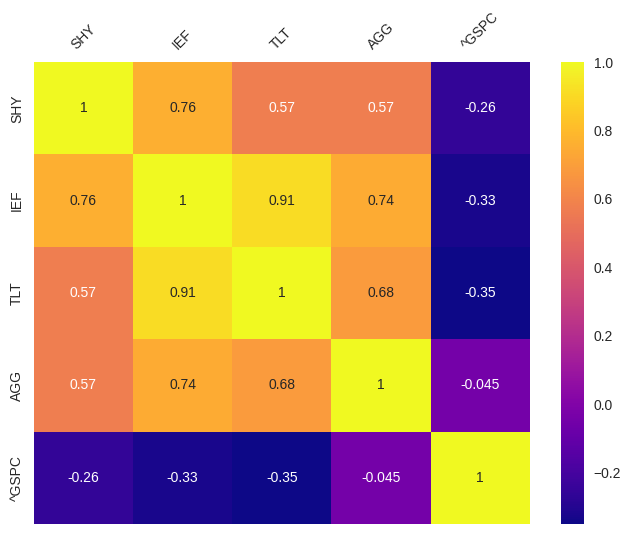

In [ ]:
correl = rnd.corr()

# Creare una heatmap utilizzando seaborn
plt.figure(figsize=(8, 6))  # Imposta la dimensione della figura
ax = sns.heatmap(correl, annot=True, cmap='plasma', xticklabels=True)
ax.xaxis.tick_top()
plt.xticks(rotation=45)
plt.show()

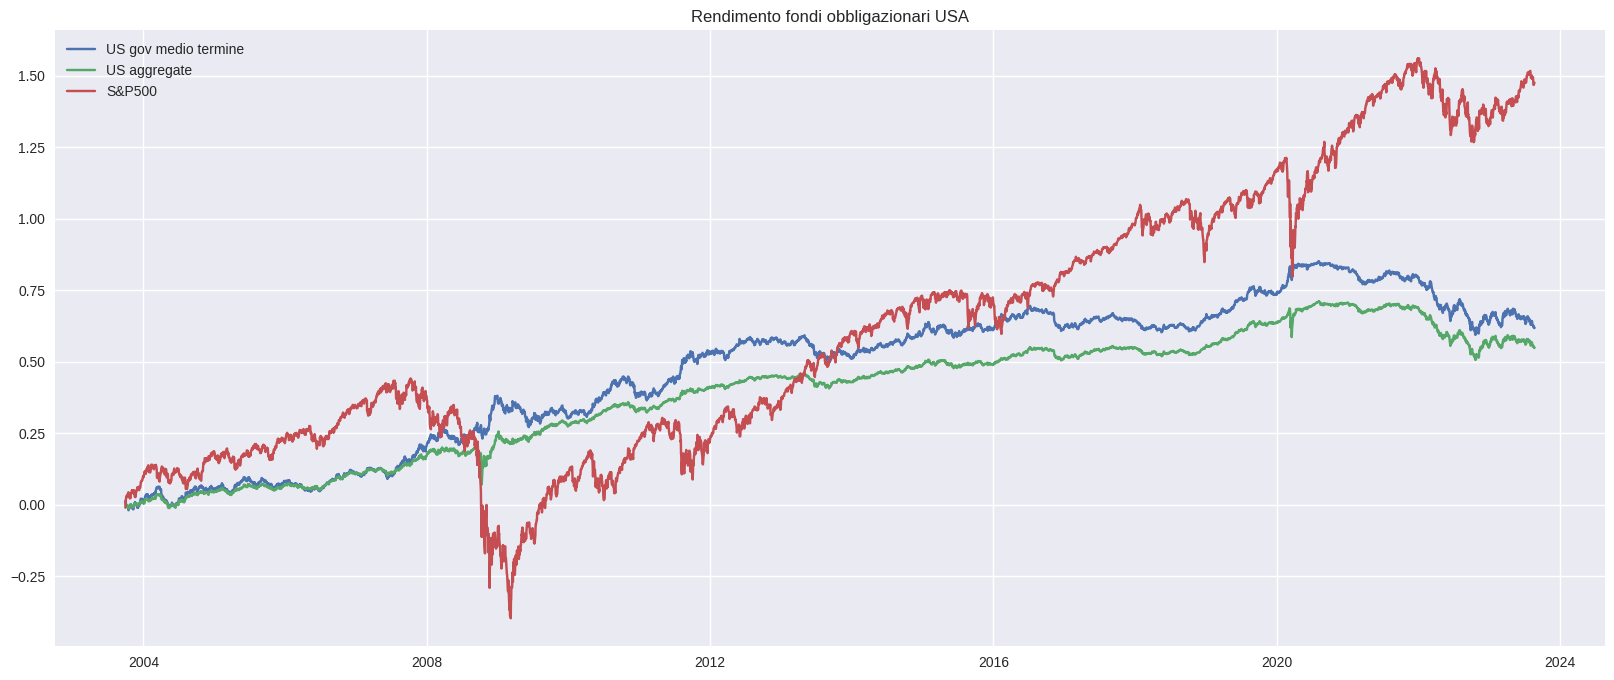

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(rnd.iloc[:,[1,3,4]].cumsum(),label=[nms[1],nms[3],nms[4]])
plt.legend()
plt.title('Rendimento fondi obbligazionari USA')
plt.show()

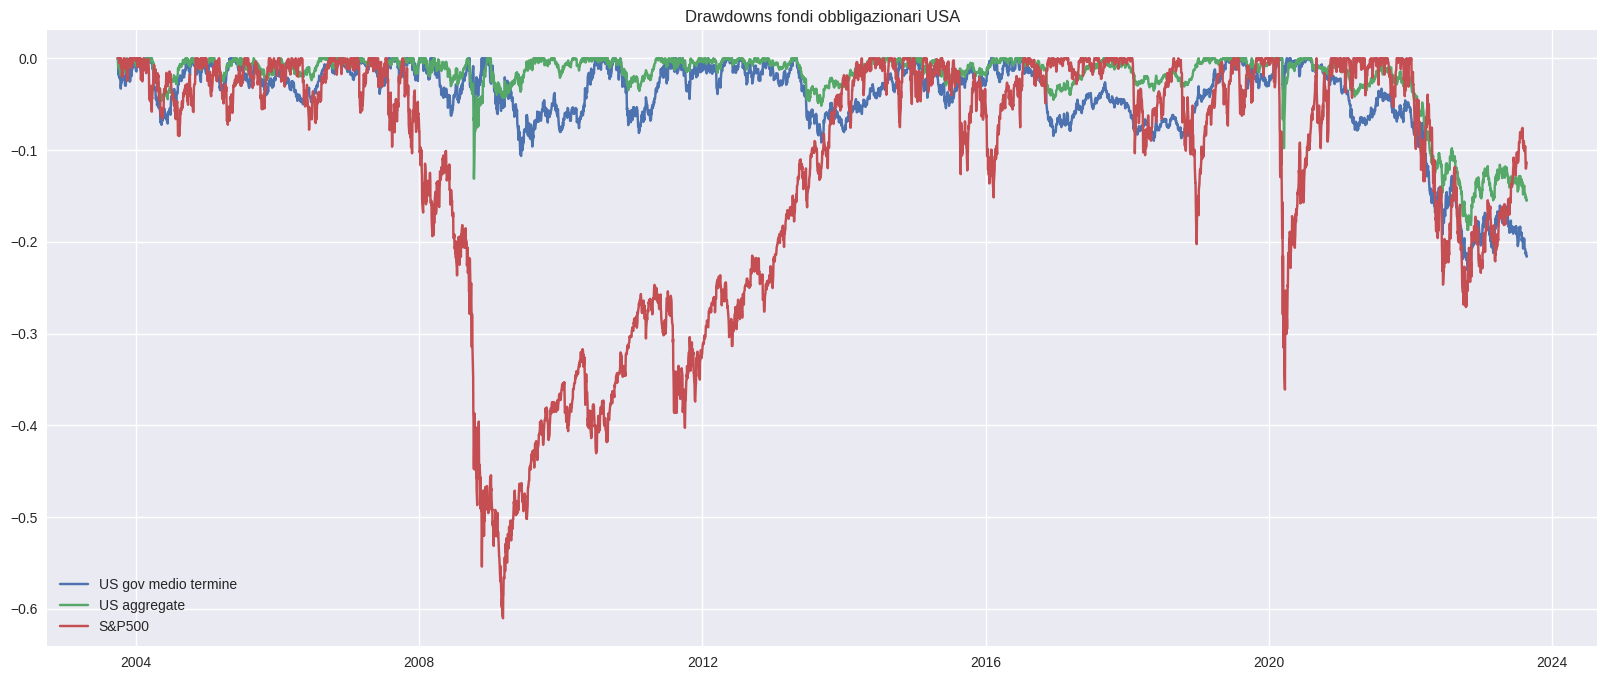

In [ ]:
dd = drawdown(rnd)
plt.figure(figsize=(20,8))
plt.plot(dd.iloc[:,[1,3,4]],label=[nms[1],nms[3],nms[4]])
plt.legend()
plt.title('Drawdowns fondi obbligazionari USA')
plt.show()

### Copertura valutaria

In [ ]:
tcks = ['XGIU.MI','XGIN.MI']
nms = ['Non hedged','Hedged']
prc = yf.download(tcks)['Adj Close']
rnd = np.log(prc/prc.shift(1)).dropna()
rnd = rnd.reindex(tcks,axis=1)

[*********************100%%**********************]  2 of 2 completed


[]

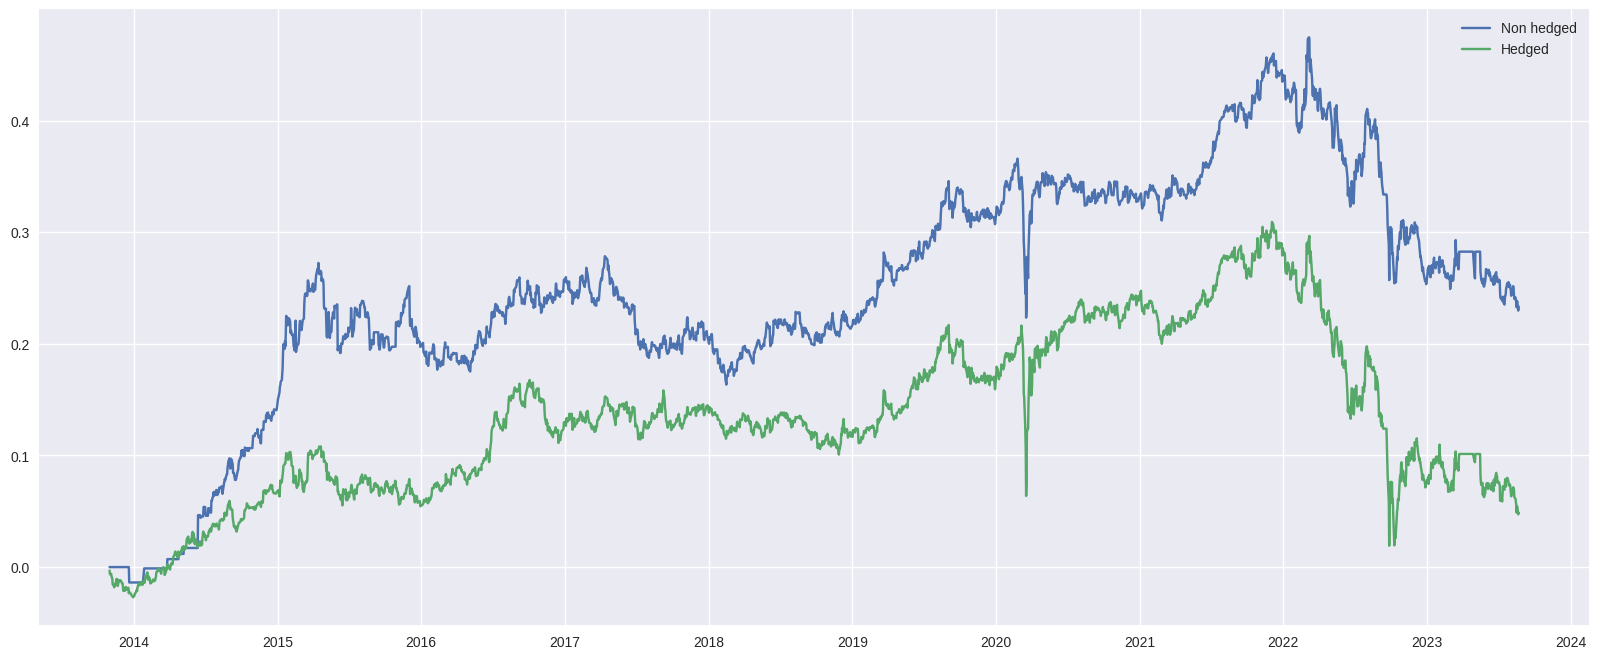

In [ ]:
plt.figure(figsize=(20,8))
plt.plot(rnd.cumsum(),label=nms)
plt.legend()
plt.plot()

### PF

In [ ]:
pf = ['SWDA.MI','EM710.MI','X13E.MI','SGLD.MI']
p1 = [0.75,0.15,0,0.1]
p2 = [0.75,0,0.15,0.1]
p3 = [1,0,0,0]

pr_pf = yf.download(pf)['Adj Close']
ren = np.log(pr_pf/pr_pf.shift(1)).dropna()
ren = ren.reindex(pf,axis=1)

[*********************100%%**********************]  4 of 4 completed


In [ ]:
results = pd.DataFrame(index=ren.index)
results[pf[1]] = ren @ p1
results[pf[2]] = ren @ p2
results[pf[0]] = ren @ p3

In [ ]:
ry = results.resample('A').sum()

<Axes: xlabel='Date'>

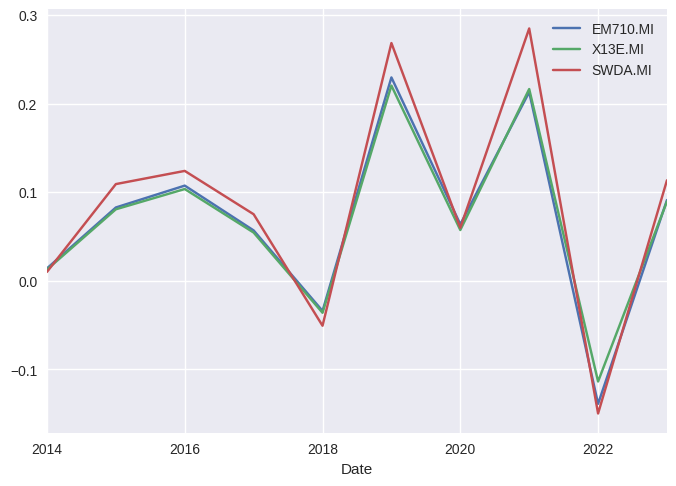

In [ ]:
ry.plot()

<Axes: xlabel='Date'>

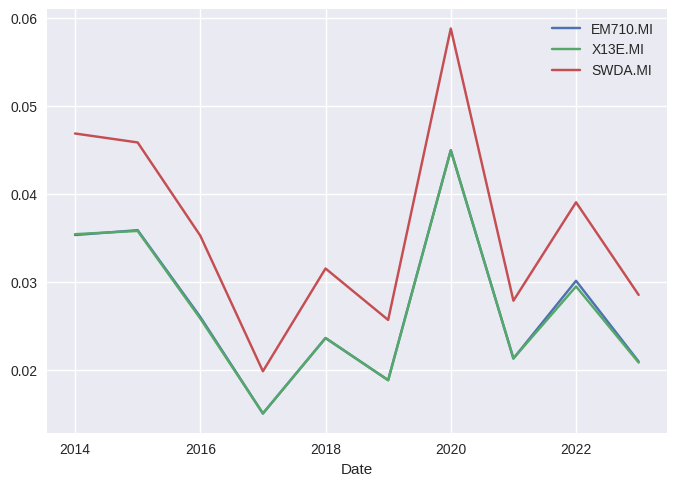

In [ ]:
sdv = []
for anno in results.index.year.unique():
  rx = results[(results.index.year==anno)]
  sdv.append(np.std(rx)*np.sqrt(12))
sdv = pd.DataFrame(sdv,index=results.index.year.unique())
sdv.plot()

---

### Altre prove

In [ ]:
tickers = ['IBCI.MI','EM710.MI','SWDA.MI']
prezzi = yf.download(tickers)['Adj Close']
rend = np.log(prezzi/prezzi.shift(1)).dropna()
rend = rend.reindex(tickers,axis=1)

[*********************100%%**********************]  3 of 3 completed


In [ ]:
np.std(rend)*np.sqrt(252)

IBCI.MI     0.063240
EM710.MI    0.054876
SWDA.MI     0.163849
dtype: float64

<Axes: xlabel='Date'>

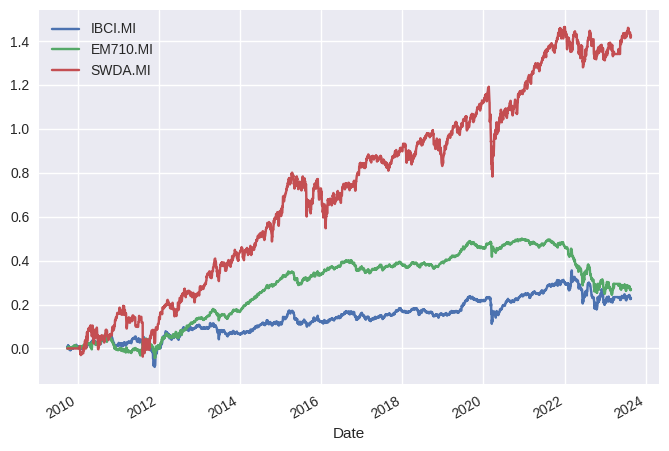

In [ ]:
rend.cumsum().plot()

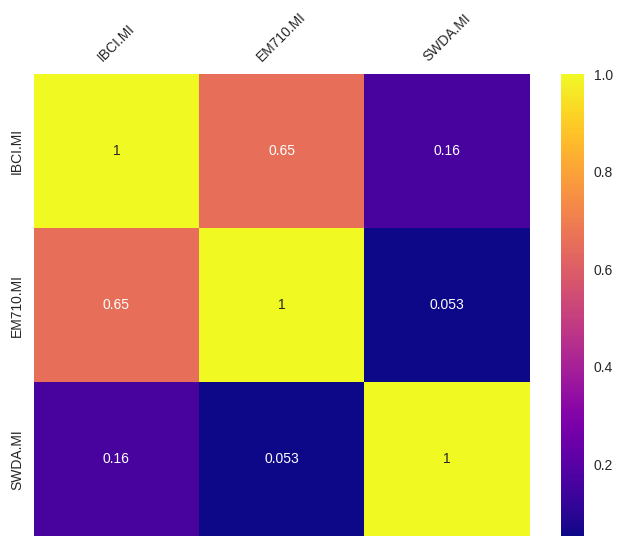

In [ ]:
correl = rend.corr()

# Creare una heatmap utilizzando seaborn
plt.figure(figsize=(8, 6))  # Imposta la dimensione della figura
ax = sns.heatmap(correl, annot=True, cmap='plasma', xticklabels=True)
ax.xaxis.tick_top()
plt.xticks(rotation=45)
plt.show()

### bond europei ~7/8 anni duration

In [ ]:
tickers = ['XGLE.MI','EM710.MI','EM1015.MI']
prezzi = yf.download(tickers)['Adj Close']
rend = np.log(prezzi/prezzi.shift(1)).dropna()
rend = rend.reindex(tickers,axis=1)

[*********************100%%**********************]  3 of 3 completed


<Axes: xlabel='Date'>

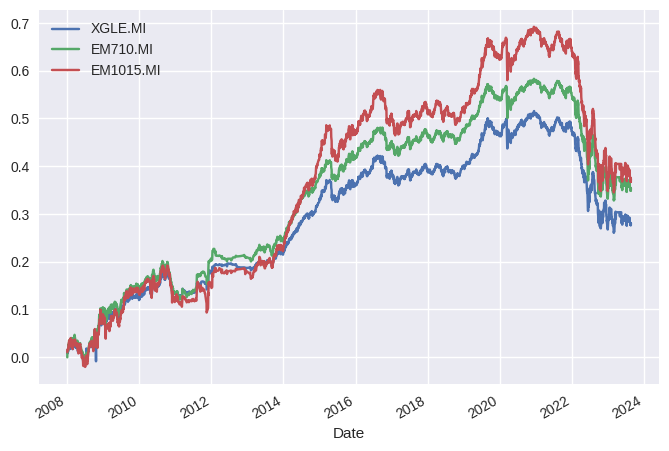

In [ ]:
rend.cumsum().plot()

In [ ]:
rend.resample('A').sum().describe()

,XGLE.MI,EM710.MI,EM1015.MI
count,16.000000,16.000000,16.000000
mean,0.017520,0.022085,0.023338
std,0.068875,0.075875,0.099769
min,-0.206541,-0.216589,-0.293028
25%,0.008432,0.008472,0.008469
50%,0.029318,0.031955,0.035096
75%,0.045833,0.047379,0.054822
max,0.109887,0.136368,0.192610
